## Lab 3: Nearest Neighbor Method (kNN)

I will create a model for predicting the surviving passengers on the Titanic (a classic kaggle training [competition](https://www.kaggle.com/c/titanic)).

![Titanic](http://staff.mmcs.sfedu.ru/~sguda/MachineLearning/titanic.png)

## 1

Read the data about those who died in the Titanic disaster. The target feature here is the fact that the passenger was saved. Look at the data.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# place for code
data=pd.read_csv('data.csv', delimiter=',')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


For simplicity, exclude passengers with an unknown age and re-number the rows

*Features that may be useful: `.dropna(subset='Age'), .reset_index(drop=True)`*

In [3]:
# place for code
data=data.dropna(subset=['Age']).reset_index(drop=True)
data.isnull().sum()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2

Plot the scatter plot with age as the abscissa axis and ticket price as the ordinate axis. Mark the dead in red, and the survived passengers in green. Build 2 separate scatter plots: for women and for men.

Does the compactness hypothesis hold for the given set?

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

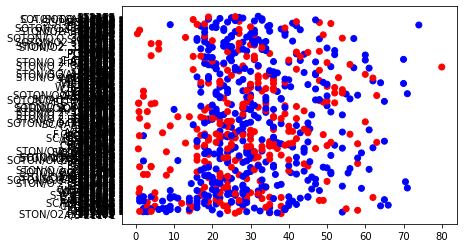

In [5]:
# place for code
plt.scatter(data['Age'],data['Ticket'],c=data['Survived'],cmap='bwr')

C:\Users\daban\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\daban\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\daban\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


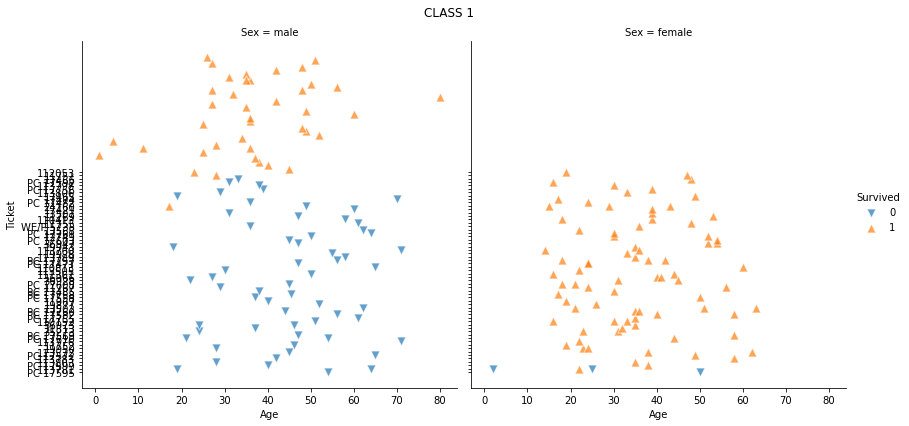

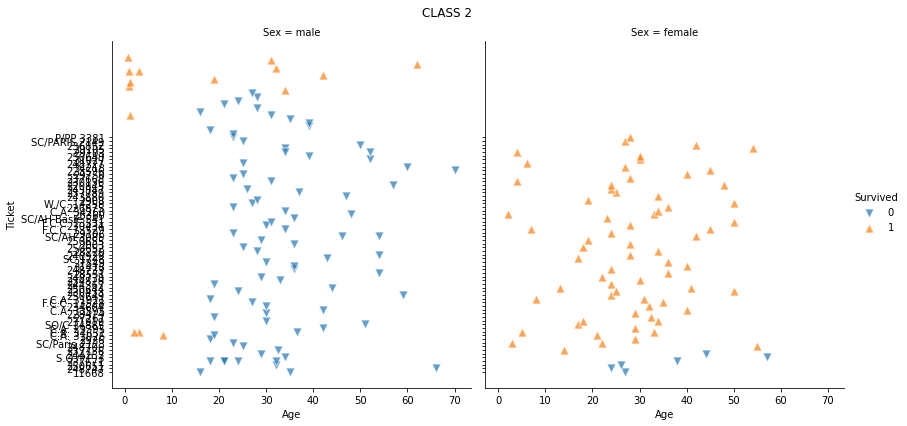

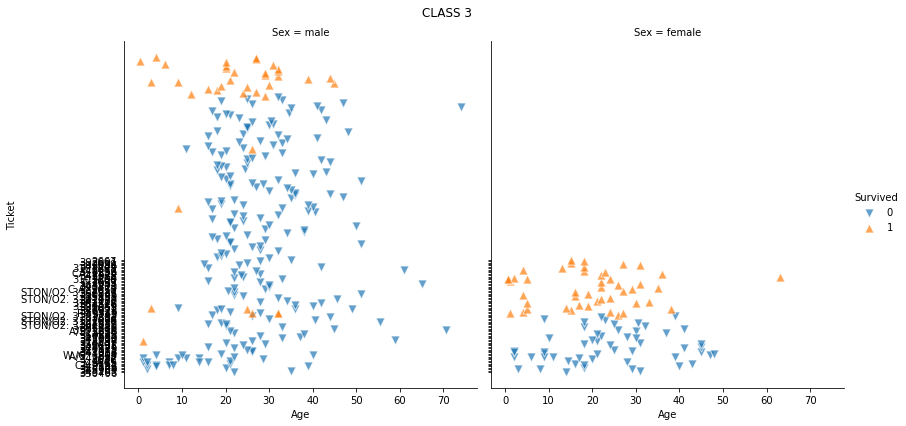

In [6]:
def scatter_plot_class(pclass):
    g = sns.FacetGrid(data[data['Pclass'] == pclass], 
                      col='Sex',
                      col_order=['male', 'female'],
                      hue='Survived', 
                      hue_kws=dict(marker=['v', '^']), 
                      size=6)
    g = (g.map(plt.scatter, 'Age', 'Ticket', edgecolor='w', alpha=0.7, s=80).add_legend())
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('CLASS {}'.format(pclass))
scatter_plot_class(1)
scatter_plot_class(2)
scatter_plot_class(3)

In [ ]:
Sex = data.groupby('Sex')['Survived'].mean()
fig, (axis) = plt.subplots(1, 1, figsize=(6,6))
ax = Sex.plot.bar(ax=axis, color='#5F9E6E', title='Survival Rate by Sex', sharey=True)

## 3 

To build the model, we will need a passenger proximity metric. Build the function for calculating the distance between passengers:

The `KNeighborsClassifier` method from the `sklearn` library is unnecessarily demanding on data types. Programming the `k` nearest neighbor method manually:

Run prediction for all passengers on the ship and use the LOO control to evaluate the classification quality:

In [32]:
import numpy as np
import tqdm
def distance(a,b):
    d = 0
    d += abs(a['Pclass'] - b['Pclass'])
    d += a['Sex'] != b['Sex']
    return d
def myKNeighborsClassifier(learnData, K, passengerIndexForPrediction):
    dists = np.zeros((learnData.shape[0] - 1, 2))
    i = 0
    for idx, row in learnData.iterrows():
        if idx != passengerIndexForPrediction:  # LOO error control method
            dists[i][0] = distance(learnData.loc[passengerIndexForPrediction,], row)
            dists[i][1] = row['Survived']
            i -= 1
    dists = sorted(dists, key = lambda pair: pair[0])
    prediction = 0
    for i in range(K): 
        prediction += dists[i][1]
    prediction /= K+1
    return round(prediction)
accuracy = 0
for idx, row in tqdm.tqdm(data.iterrows(),total=len(data)):
    accuracy += row['Survived'] == myKNeighborsClassifier(data, 5, idx)
print(accuracy/data.shape[0])

100%|██████████| 714/714 [06:41<00:00,  1.78it/s]

0.7913165266106442


Select the terms in the metric, their weights, and the number of neighbors so that the classification quality would be as high as possible. 

If a function in `python` runs for a long time, use its equivalent in 
C++: `KNeighborsClassifier.cpp`.

Compilation on Linux is performed by the command 

 g++ - O2 KNeighborsClassifier.cpp -o KNeighborsClassifier


Launch: 

 ./KNeighborsClassifier
    
Who built the metric with the best quality: +5 bonus points.

## 4

Create a copy of the `KNeighborsClassifier` function and change it to calculate the margins of objects. Call it calcMargin.

Calculate the margins for all objects and output information about the five objects with the minimum margin (outliers) and the five objects with the maximum margin (etalons). Explain the result in comments.

In [33]:
# place for code
def distance(a,b):
    d = 0
    d += abs(a['Pclass'] - b['Pclass'])
    d += a['Sex'] != b['Sex']
    return d
def calcMargin(learnData, K, passengerIndexForPrediction):
    dists = np.zeros((learnData.shape[0] - 1, 2))
    i = 0
    for idx, row in learnData.iterrows():
        if idx != passengerIndexForPrediction:  # LOO error control method
            dists[i][0] = distance(learnData.loc[passengerIndexForPrediction,], row)
            dists[i][1] = row['Survived']
            i += 1
    dists = sorted(dists, key = lambda pair: pair[0])
    Margin = 0
    for i in range(K): 
        if dists[i][1] == learnData.loc[passengerIndexForPrediction,'Survived']:
            Margin += 1
        else:
            Margin -=1
    return (Margin)
margins = [10]*data.shape[0]
for idx, row in tqdm.tqdm(data.iterrows(),total=len(data)):
    margins[idx] = calcMargin(data, 3, idx)

100%|██████████| 714/714 [06:22<00:00,  1.87it/s]


This is most easily done using the `np.argsort` function, which returns the indexes of elements in the sorted row:

In [34]:
idx = np.argsort(margins)

In [35]:
print('Black sheeps (outliers)')
data.loc[idx[:5],]

Black sheeps (outliers)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
400,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
536,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
215,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,7.7750,NaN,S
612,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,NaN,Q
390,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,C.A. 37671,15.9000,NaN,S


In [36]:
print('Etalons (typical objects)')
data.loc[idx[-5:],]

Etalons (typical objects)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
300,377,1,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.2500,NaN,S
297,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
296,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
293,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
713,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
